In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
from re import split
from collections import Counter

%matplotlib inline

In [3]:
columns = ('review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date')

values = []

curr_line = 1

for line in open('yelp_dataset/yelp_academic_dataset_review.json', encoding='utf-8'):
    row_dict = json.loads(line)
    values.append(row_dict.values())
    
    curr_line += 1

    if curr_line > 20000:
        break
    
df = pd.DataFrame(values, columns=columns)

In [4]:
iopub_data_rate_limit=1.0e10

In [5]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    20000 non-null  object 
 1   user_id      20000 non-null  object 
 2   business_id  20000 non-null  object 
 3   stars        20000 non-null  float64
 4   useful       20000 non-null  int64  
 5   funny        20000 non-null  int64  
 6   cool         20000 non-null  int64  
 7   text         20000 non-null  object 
 8   date         20000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [6]:
df['sentiment'] = df['stars'].apply(lambda x: -1 if x <= 2 else 0 if x == 3 else 1)

<Axes: xlabel='sentiment', ylabel='count'>

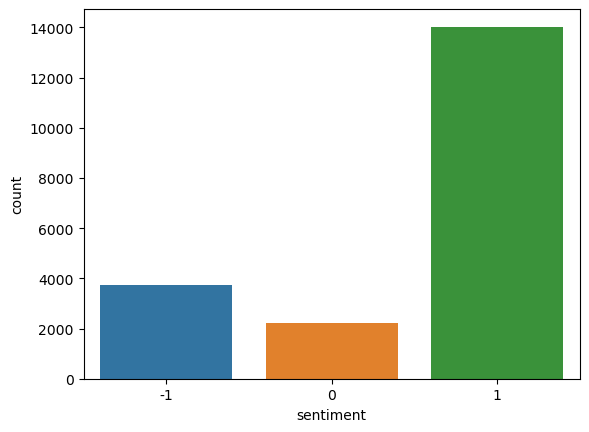

In [52]:
sns.countplot(df, x='sentiment')

In [8]:
df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,1
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,1
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,1
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,-1
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18,1
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,1
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33,0
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06,0


In [37]:
sentimental_words = set()

for line in open('Positive and Negative Word List.csv'):
    line_elements = line.split(',')
    
    if line_elements[0] and int(line_elements[0]) > 0:
        sentimental_words.add(line_elements[1].strip())
        
        if line_elements[2].strip() != '':
            sentimental_words.add(line_elements[2].strip())

In [38]:
sentimental_words

{'beguile',
 'highly-seasoned',
 'outcast',
 'simply',
 'bonus',
 'recourses',
 'despotic',
 'fissures',
 'hope-chest',
 'trashy',
 'under',
 'thug',
 'foulness',
 'unproductive',
 'gleam',
 'knee-slapper',
 'zippy',
 'uproar',
 'driven',
 'pugnaciously',
 'revert',
 'irredeemably',
 'hotshot',
 'err',
 'bedlam',
 'insightfully',
 'elocution',
 'demonize',
 'window',
 'headway',
 'pestilent',
 'downside',
 'criticized',
 'frustrated',
 'perk',
 'conceded',
 'snugly',
 'mate',
 'pauper',
 'accord',
 'wary',
 'boil',
 'unnoticed',
 'omnipotent',
 'mangle',
 'impulsively',
 'indigent',
 'snagged',
 'starve',
 'sting',
 'star',
 'massacres',
 'champ',
 'wakefulness',
 'disquiet',
 'qualify',
 'onward',
 'originative',
 'restriction',
 'well-received',
 'personable',
 'hermetic',
 'restful',
 'significance',
 'unacceptably',
 'trample',
 'strong',
 'exhausted',
 'safety-catch',
 'gratefulness',
 'vivace',
 'dauntless',
 'bold',
 'rejuvenated',
 'demanding',
 'petichor',
 'movingly',
 'spook

In [36]:
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def process_review(review):
    review = review.lower()
    
    review = review.translate(str.maketrans('', '', punctuation))
    
    words = word_tokenize(review)
    
    return [w for w in words if w in sentimental_words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\derek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
df.head()['text'].apply(process_review)

0    [you, just, aware, going, take, beginning, hav...
1    [of, over, the, the, the, nice, clean, space, ...
2    [family, the, eclectic, large, fried, fresh, a...
3    [wow, yummy, different, delicious, the, with, ...
4    [cute, owner, of, upcoming, will, great, on, b...
Name: text, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
bag_transformer = CountVectorizer(analyzer=process_review).fit(df['text'])

In [34]:
print(len(bag_transformer.vocabulary_))
print(bag_transformer.transform([df['text'][0]]))

4360
  (0, 140)	1
  (0, 150)	1
  (0, 173)	1
  (0, 1370)	1
  (0, 1525)	1
  (0, 1528)	1
  (0, 1658)	3
  (0, 1848)	2
  (0, 2053)	2
  (0, 2145)	1
  (0, 2238)	1
  (0, 2400)	1
  (0, 2496)	1
  (0, 2679)	1
  (0, 2861)	1
  (0, 3743)	1
  (0, 3794)	3
  (0, 4101)	2
  (0, 4130)	2
  (0, 4181)	1
  (0, 4202)	1
  (0, 4338)	1
  (0, 4339)	1


In [44]:
bag = bag_transformer.transform(df['text'])

In [73]:
sparse_matrix = pd.DataFrame(bag.toarray(), columns=bag_transformer.get_feature_names_out())

In [74]:
sparse_matrix

,able,abominable,abomination,abrasive,abrupt,abruptly,absence,absurd,absurdly,abundance,...,zen,zero,zest,zesty,zillion,zing,zinger,zip,zombie,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Most frequent words with significant sentiment')

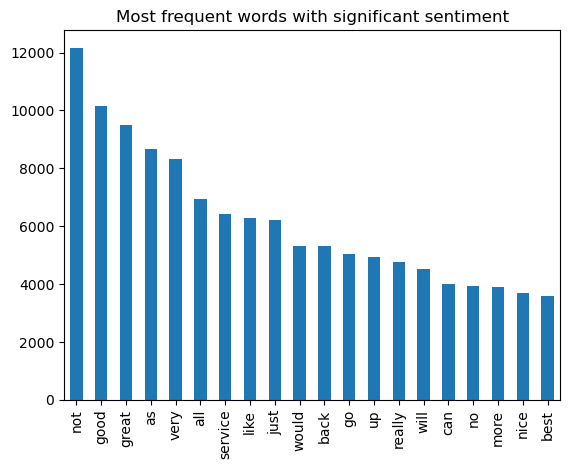

In [82]:
top_cols = sparse_matrix.sum(axis=0).sort_values(ascending=False)

top_cols_abridged = top_cols.head(28)
top_cols_abridged[:][8:].plot(kind='bar')
plt.title('Most frequent words with significant sentiment')

Text(0.5, 1.0, 'Top word frequencies')

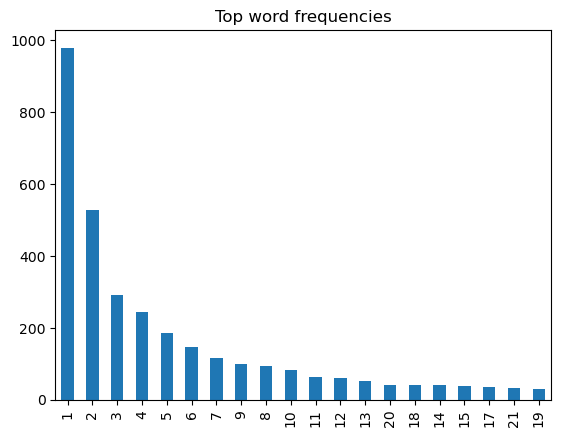

In [86]:
top_word_frequencies = top_cols.value_counts().head(20)
top_word_frequencies.plot(kind='bar')
plt.title('Top word frequencies')

(-0.5, 1199.5, 799.5, -0.5)

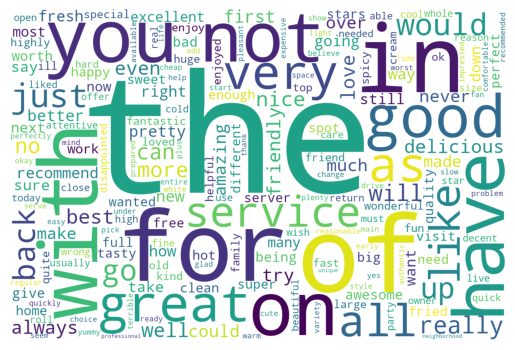

In [90]:
from wordcloud import WordCloud

wordcloud = WordCloud(height=800, width=1200, background_color='white').generate_from_frequencies(sparse_matrix.sum(axis=0))
plt.imshow(wordcloud)
plt.axis('off')

In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bag)
tfidf = tfidf_transformer.transform(bag)

In [93]:
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_transformer.get_feature_names_out())

In [94]:
tfidf_matrix

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x4350,x4351,x4352,x4353,x4354,x4355,x4356,x4357,x4358,x4359
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(-0.5, 799.5, 399.5, -0.5)

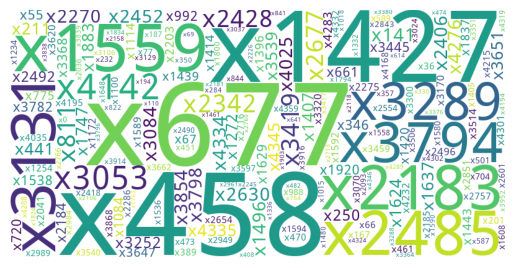

In [95]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_matrix.max())
plt.imshow(wordcloud)
plt.axis('off')

In [98]:
tfidf_arr = tfidf.toarray()
X_train, X_val, y_train, y_val = tfidf_arr[:10000], tfidf_arr[10000:], df['sentiment'][:10000], df['sentiment'][10000:]

In [102]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

classifiers = []

for NBClassifier in (GaussianNB, MultinomialNB, BernoulliNB):
    classifier = NBClassifier()
    classifier.fit(X_train, y_train)
    print(f'{NBClassifier.__name__} error: {np.mean(y_val != classifier.predict(X_val))}')

GaussianNB error: 0.735
MultinomialNB error: 0.2534
BernoulliNB error: 0.2349
